In [1]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [4]:
y_train[0]

9

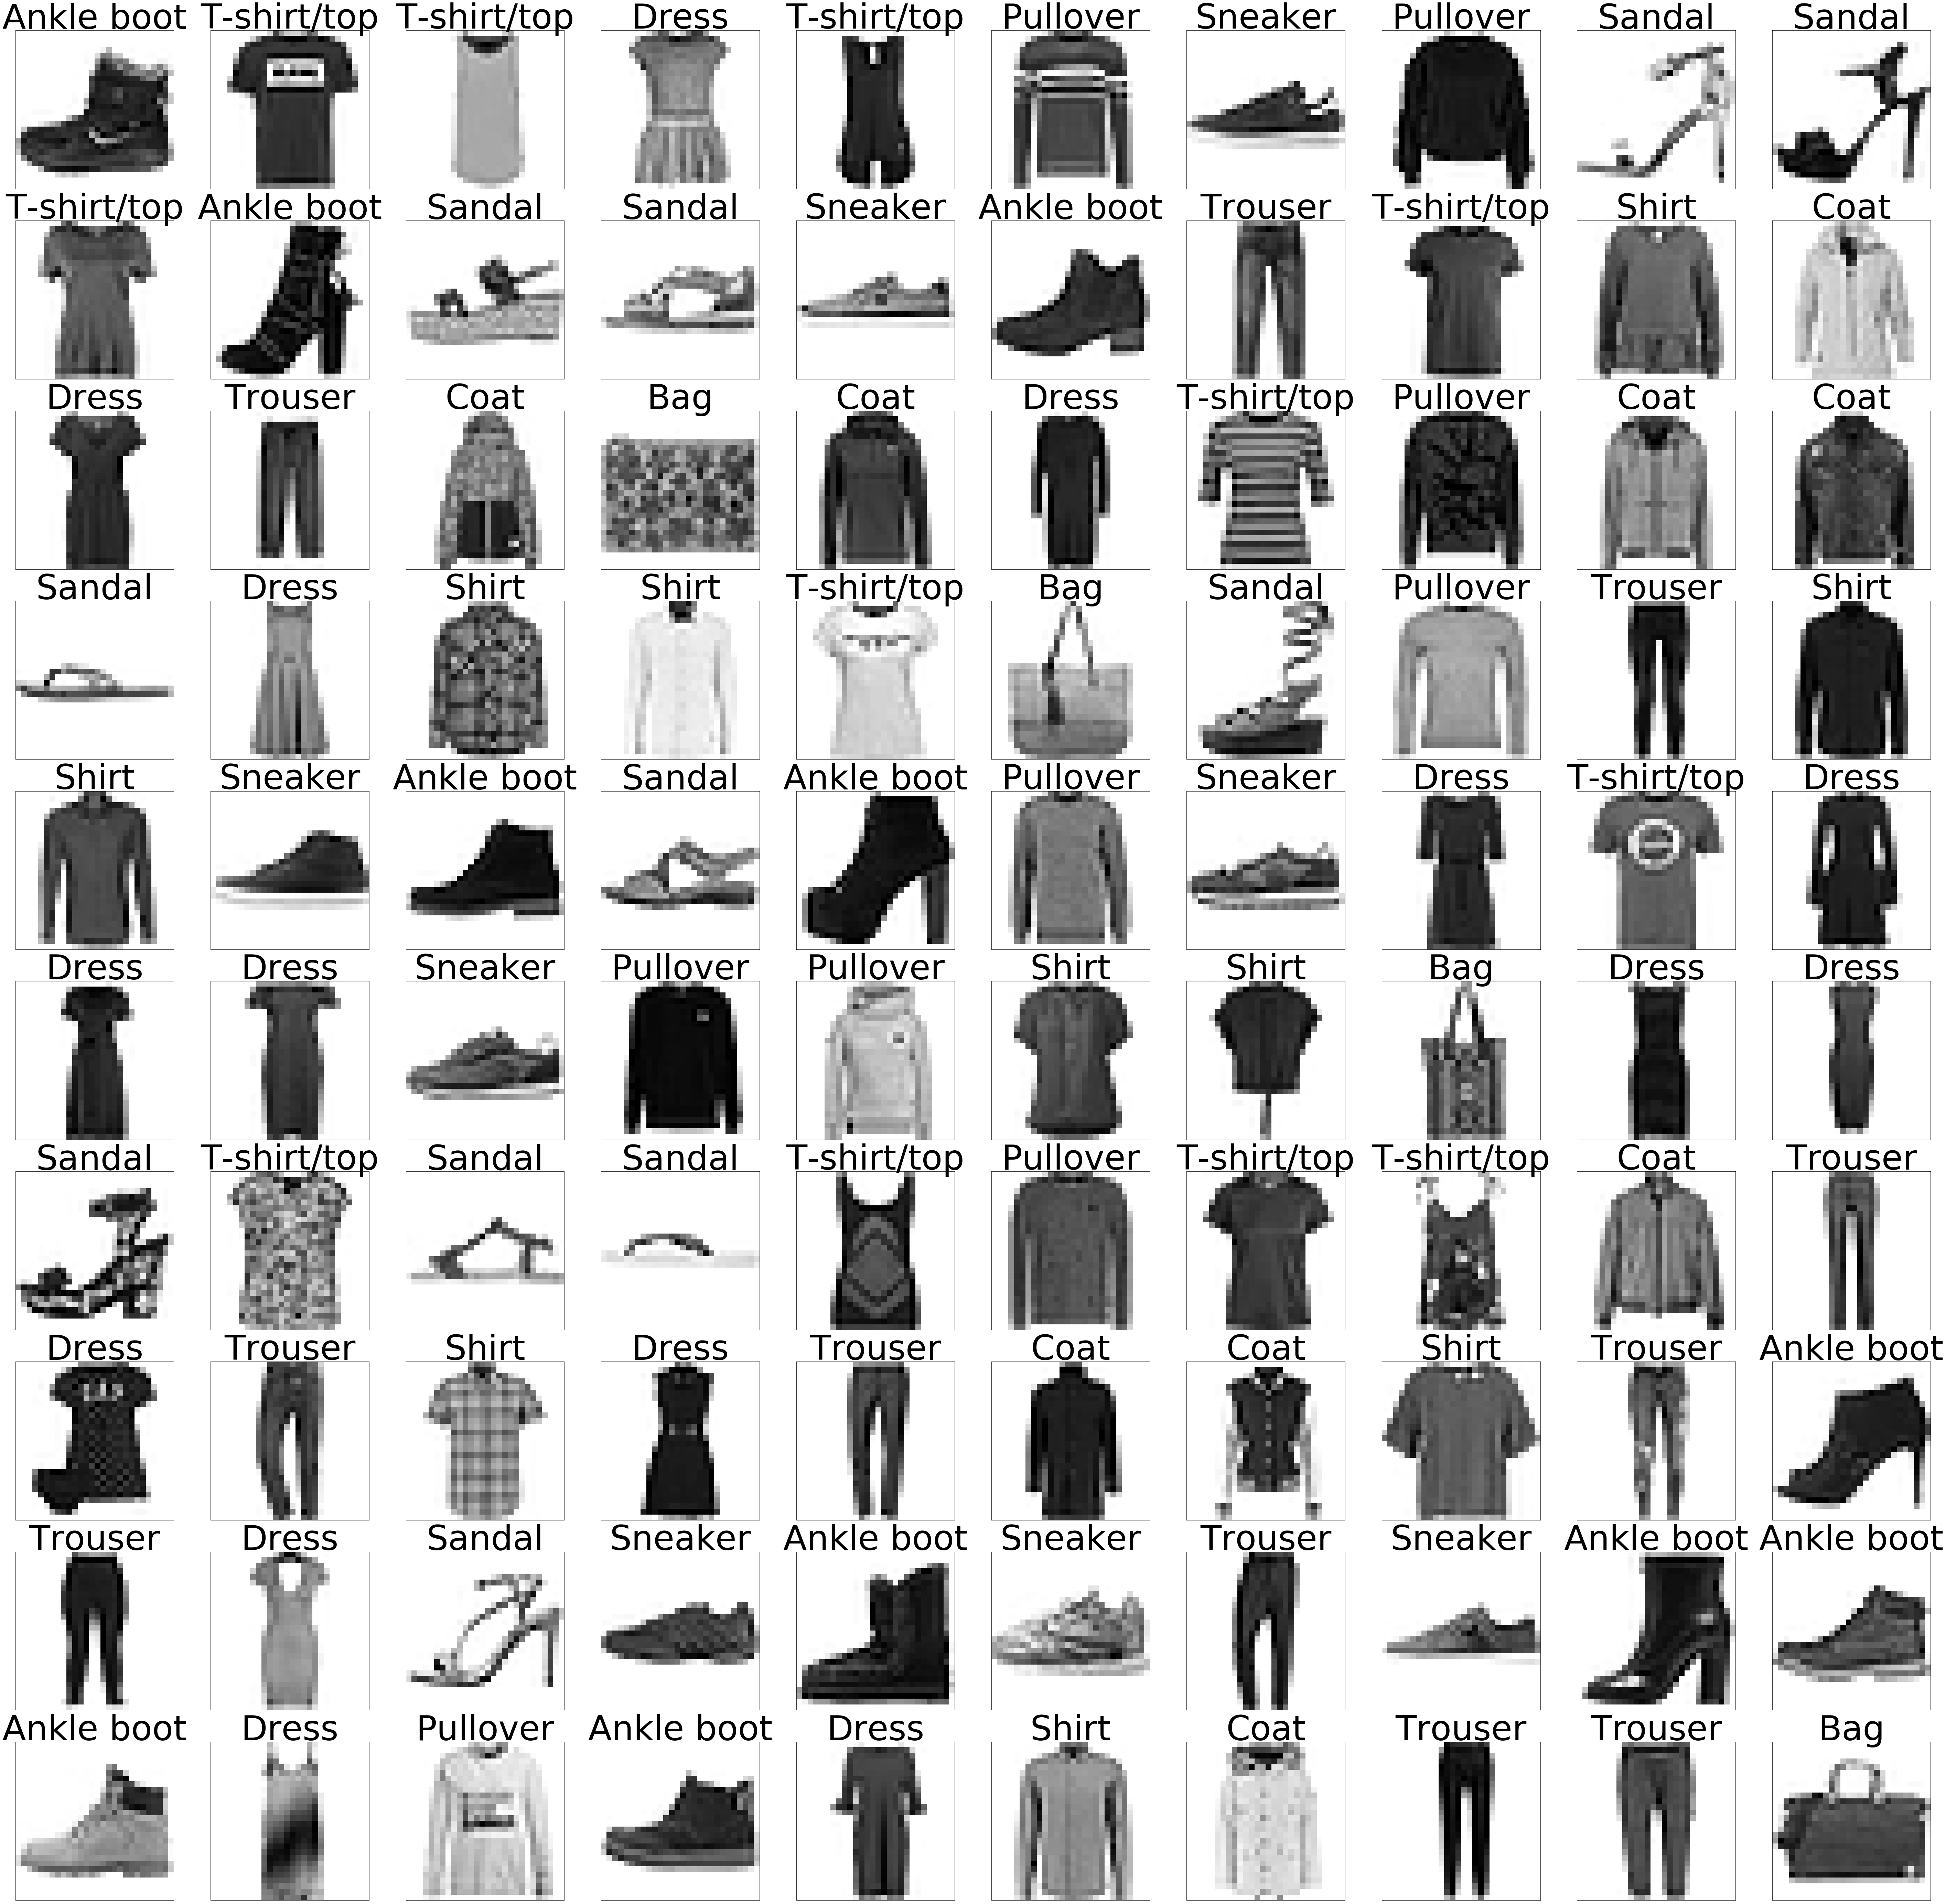

In [5]:
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(100,100))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)    # cmap=plt.cm.binary; 이 부분 없으면 형광색으로 나옴. 
    plt.title(fashion_mnist[y_train[i]], fontsize=100)
plt.show()

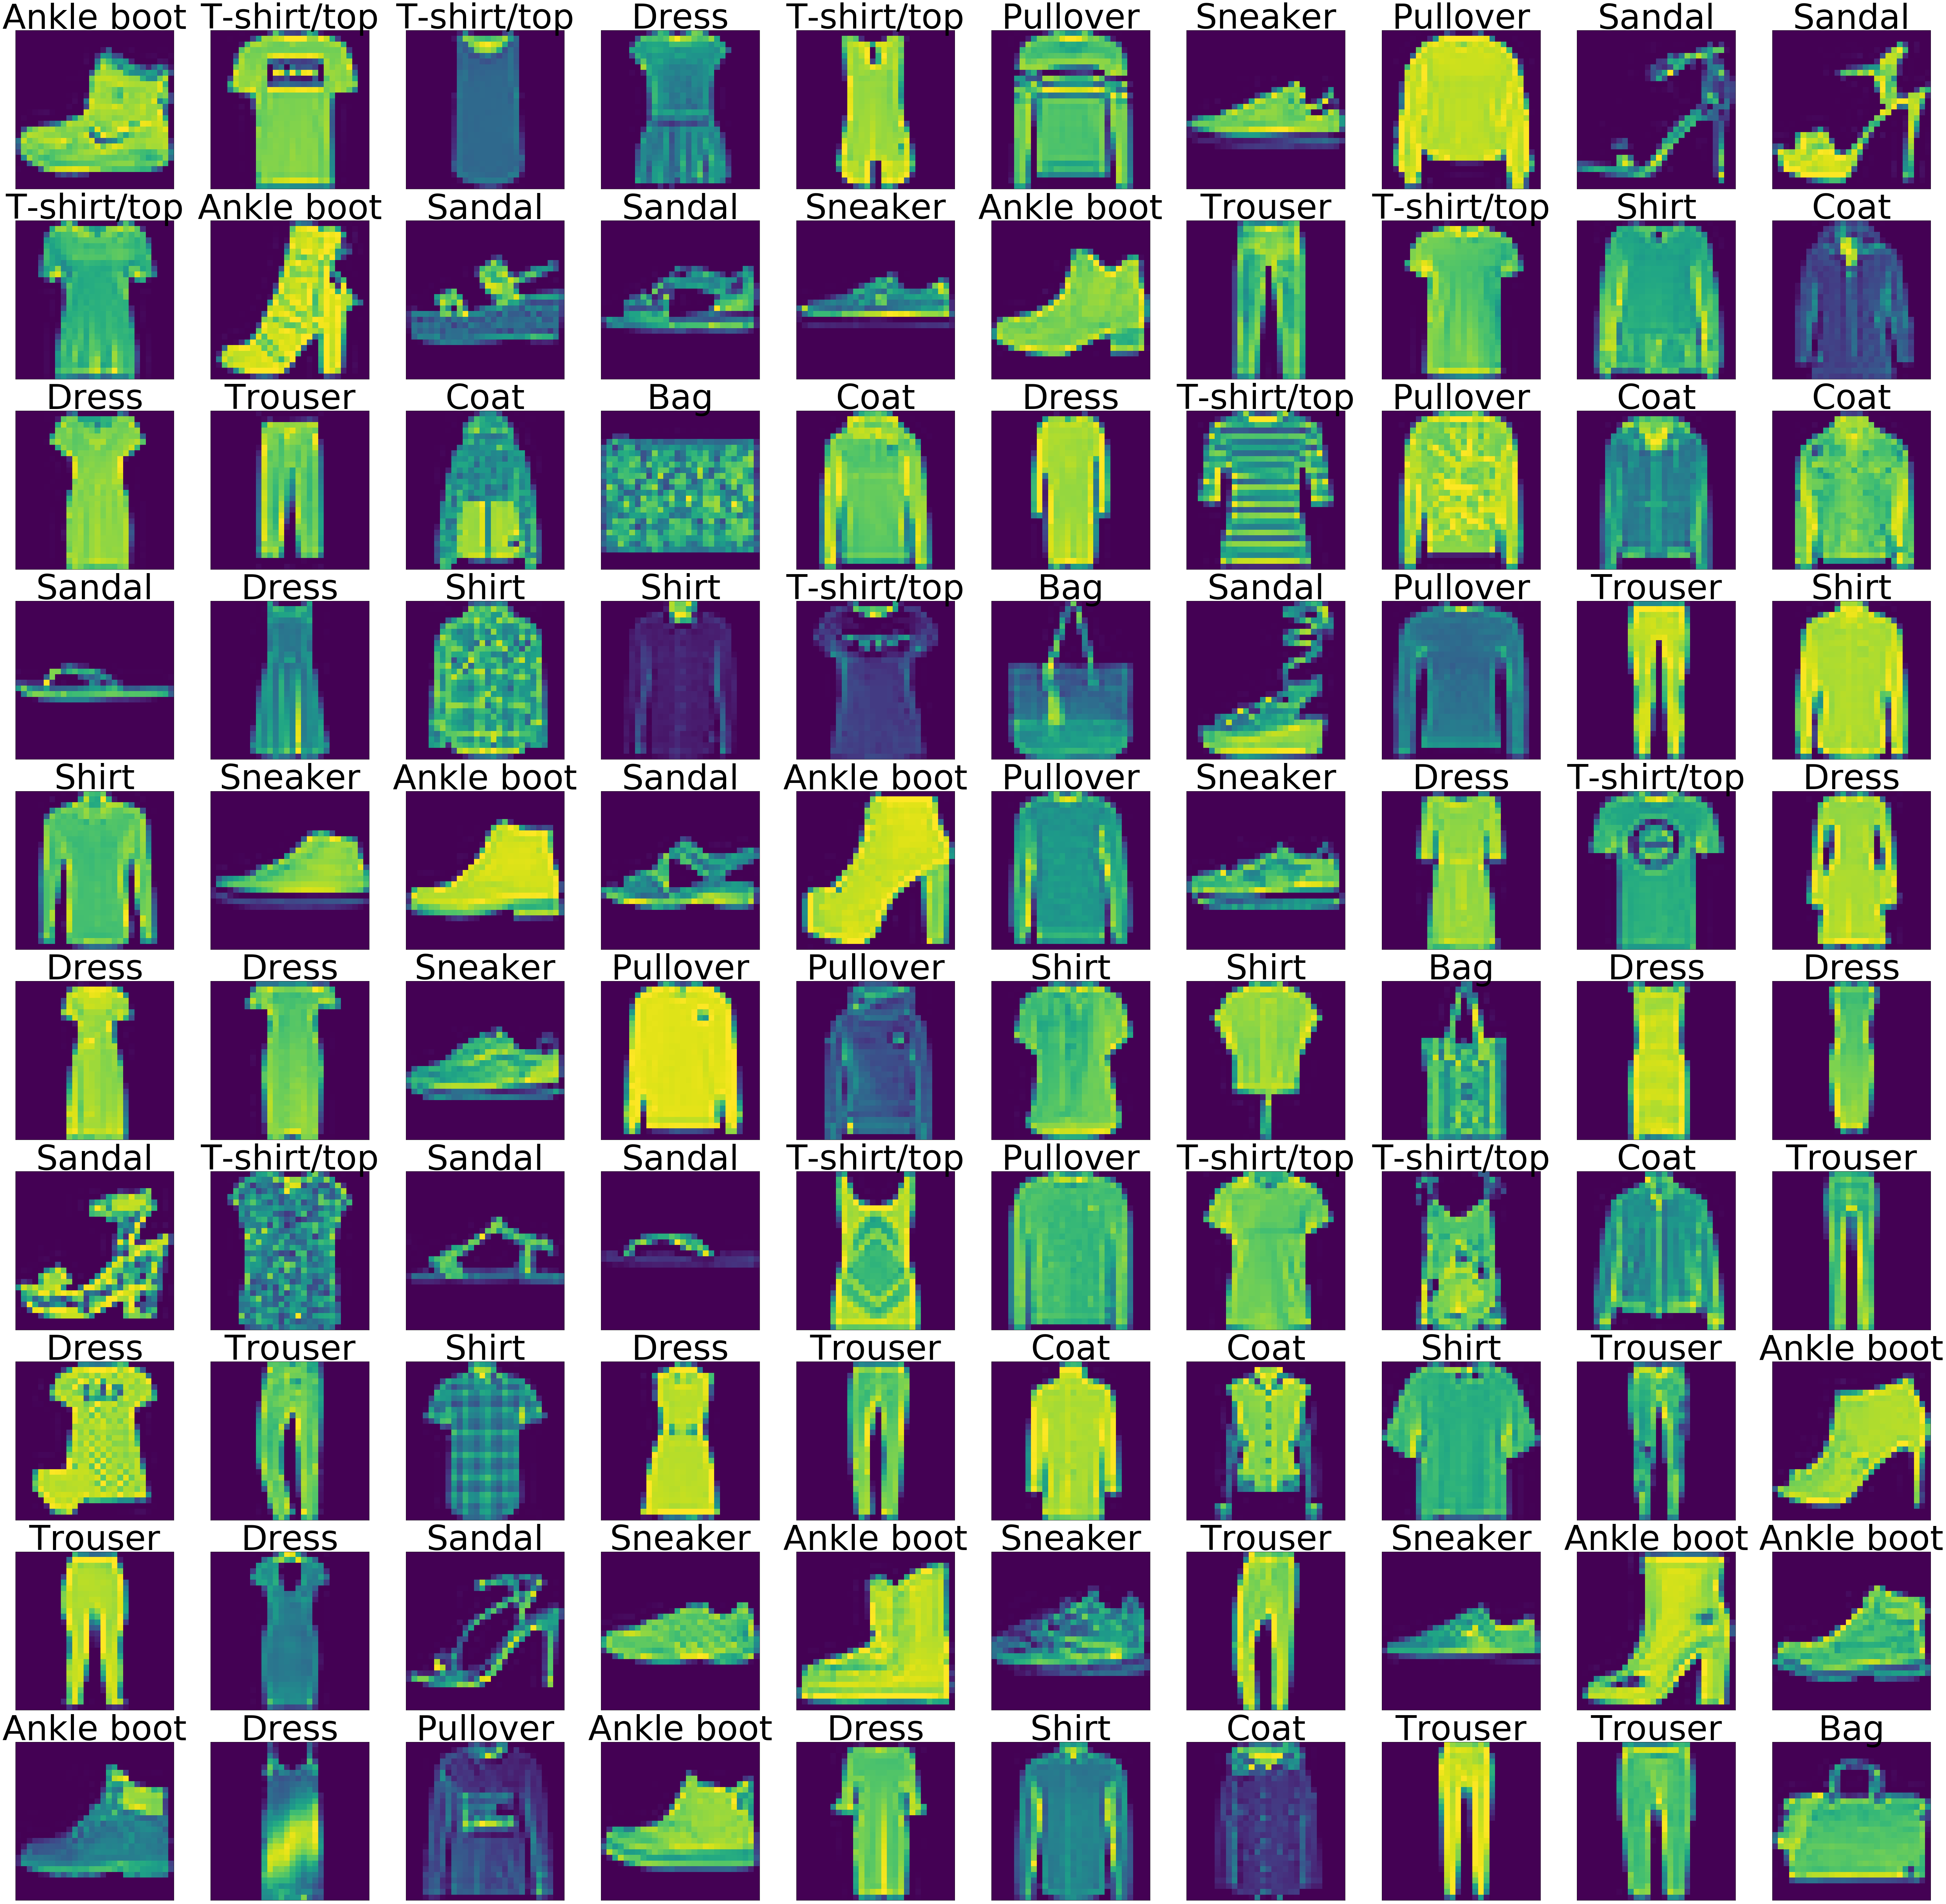

In [7]:
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(100,100))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])  
    plt.title(fashion_mnist[y_train[i]], fontsize=100)
plt.show()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [22]:
img_rows, img_cols = x_train.shape[1:]

In [23]:
x_train.shape[1:]

(28, 28)

In [24]:
img_rows, img_cols

(28, 28)

In [25]:
x_train.shape[0]

60000

In [26]:
x_train.shape[1]

28

In [27]:
x_train.shape[2]

28

In [28]:
x_train.shape[3]

IndexError: tuple index out of range

In [29]:
type(x_train.shape)

tuple

In [30]:
img_rows, img_cols = x_train.shape[1:]

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


그림으로부터 숫자들이 어떻게 나오는지 알아야 함

In [32]:
# learging rate 설정 
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #lr: learning rate

In [33]:
img_rows, img_cols

(28, 28)

In [34]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [35]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)
# batch size = 32 (batch size 언급 없었음. 32가 디폴트값.)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 26s 657us/sample - loss: 0.5199 - acc: 0.8175 - val_loss: 0.4320 - val_acc: 0.8463 acc: 0
Epoch 2/10
40199/40199 [==============================] - 19s 481us/sample - loss: 0.3914 - acc: 0.8600 - val_loss: 0.3858 - val_acc: 0.8628
Epoch 3/10
40199/40199 [==============================] - 18s 450us/sample - loss: 0.3465 - acc: 0.8749 - val_loss: 0.3768 - val_acc: 0.8603
Epoch 4/10
40199/40199 [==============================] - 19s 478us/sample - loss: 0.3163 - acc: 0.8844 - val_loss: 0.3296 - val_acc: 0.8805
Epoch 5/10
40199/40199 [==============================] - 16s 404us/sample - loss: 0.2948 - acc: 0.8914 - val_loss: 0.3458 - val_acc: 0.8741
Epoch 6/10
40199/40199 [==============================] - 17s 416us/sample - loss: 0.2783 - acc: 0.8978 - val_loss: 0.3190 - val_acc: 0.8831
Epoch 7/10
40199/40199 [==============================] - 17s 426us/sample - loss: 0.2625 - acc: 

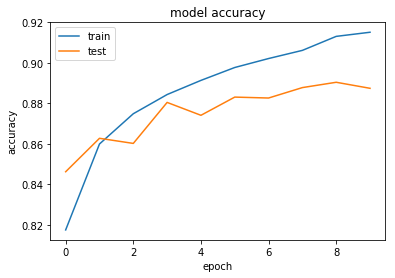

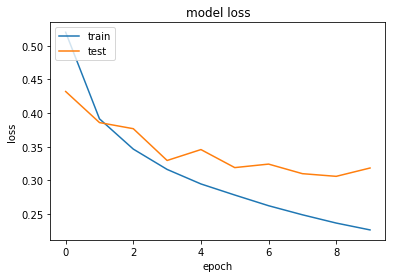

In [49]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])     
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])      # 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# overfitting 
# 최적의 epoch는 2 

Pullover


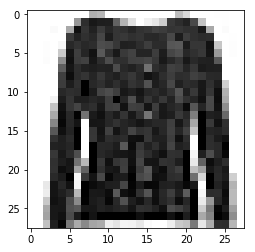

In [55]:
testID = 89   # test ID는 그냥 변수를 만들어 놓은 것. 딱 89라 정의함
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(x_test[testID], cmap=plt.cm.binary)  # cmap: 흑백으로 만듦
out = model.predict(x_test[testID].reshape(1,img_rows, img_cols))  # 1을 넣어서 들어갈 수 있는 형식을 만들었음.
print(fashion_mnist[np.argmax(out)])   # argmax: 가장 큰 값을 가져오겠다. => 가장 맞는 카테고리

In [56]:
# 각 값들이 T-shirt/top일 확률, Trouser일 확률, Pullover일 확률, ... 등 이다. 따라서 모든 확률값들을 더하면 1이 됨.
# out = predict해서 나온 값
out

array([[2.4356425e-01, 9.7811471e-07, 6.8100226e-01, 2.7050872e-04,
        9.2655962e-04, 1.8556868e-07, 7.3115595e-02, 2.7991271e-07,
        1.1191411e-03, 3.6542991e-07]], dtype=float32)

In [57]:
np.sum(out)

1.0000001

In [58]:
# 이런 게 있다 정도만..

model.save_weights('fashion_mnist_weights.h5') 
model.load_weights('fashion_mnist_weights.h5')

In [59]:
model.save_weights('fashion_mnist_weights.h5')